# Loading Dataset

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
import matplotlib.pyplot as plt
print(os.listdir("directory"))
# print(os.listdir(train_path))

# train_path
# Any results you write to the current directory are saved as output.

from time import time

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.callbacks import TensorBoard,EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,Callback
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

['sample_submission.csv', 'test', 'train', 'train_labels.csv']


# Exploratory Data Analysis

In [23]:
# datapath='../input/'+os.listdir("../input")[1]+'/'
# if not Path(datapath).is_dir():
datapath='directory'
df = pd.read_csv(datapath+'train_labels.csv')
print(df.head())

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


In [24]:
print('Number of image : ', len(df))
print('Ratio labels : ', sum(df['label'].values)/len(df))
img = plt.imread(datapath+"train/"+df.iloc[0]['id']+'.tif')
print('Images shape', img.shape)

Number of image :  220025
Ratio labels :  0.40503124644926713
Images shape (96, 96, 3)


0


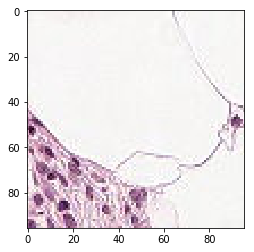

1


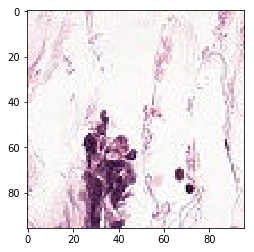

0


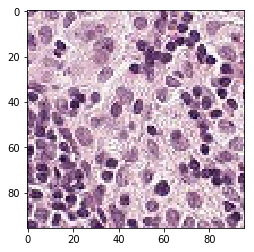

0


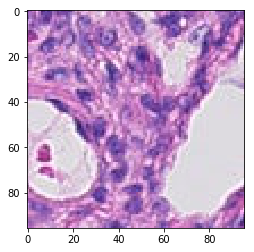

0


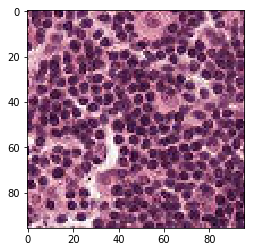

In [25]:
for i in range(5):
    img = plt.imread(datapath+"train/"+df.iloc[i]['id']+'.tif')
    print(df.iloc[i]['label'])
    plt.imshow(img)
    plt.show()

# Model definition

In [33]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (96, 96, 3)))
#96
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
#96
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
#96
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3))
#32
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3))
#11
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3))
#4
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
dropout_51 (Dropout)         (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 32, 32, 32)        9248      
__________

In [34]:
df = pd.read_csv(datapath+'train_labels.csv',dtype='str')
def append_ext(fn):
    return fn+".tif"

df["id"]=df["id"].apply(append_ext)
train_datagen = ImageDataGenerator(
       # horizontal_flip=True,
       #vertical_flip=True,
       #brightness_range=[0.5, 1.5],
       #fill_mode='reflect',                               
        #rotation_range=15,
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2
        validation_split=0.15
    
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_path = datapath+'train'
valid_path =  datapath+'train'
test_path=datapath+'test'
print(train_path)
print(valid_path)

print(df.head())
print(df.dtypes)
print(df.loc[0])
print(df.loc[1])

C:\Users\dhruv\Downloads\histopathologic-cancer-detection\train
C:\Users\dhruv\Downloads\histopathologic-cancer-detection\train
                                             id label
0  f38a6374c348f90b587e046aac6079959adf3835.tif     0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif     1
2  755db6279dae599ebb4d39a9123cce439965282d.tif     0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif     0
4  068aba587a4950175d04c680d38943fd488d6a9d.tif     0
id       object
label    object
dtype: object
id       f38a6374c348f90b587e046aac6079959adf3835.tif
label                                               0
Name: 0, dtype: object
id       c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif
label                                               1
Name: 1, dtype: object


# Dataset Generators

In [37]:
train_generator = train_datagen.flow_from_dataframe(
                dataframe=df,
                directory=train_path,
                x_col = 'id',
                y_col = 'label',
                has_ext=False,
                subset='training',
                target_size=(96, 96),
                batch_size=256,
                class_mode='binary'
                )


validation_generator = train_datagen.flow_from_dataframe(
                dataframe=df,
                directory=valid_path,
                x_col = 'id',
                y_col = 'label',
                has_ext=False,
                subset='validation', # This is the trick to properly separate train and validation dataset
                target_size=(96, 96),
                batch_size=64,
                shuffle=False,
                class_mode='binary'
                )
# df_test = pd.read_csv(datapath+'train_labels.csv')
# test_generator = test_datagen.flow_from_directory(test_path,
#                                         target_size=(96,96),
#                                         batch_size=64,
#                                         class_mode='binary',
#                                         shuffle=False)

Found 187022 images belonging to 2 classes.
Found 33003 images belonging to 2 classes.


In [38]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
    
        plt.figure(figsize=(16,10))
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
        plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()
        
    def save(self,name):
        arr=np.vstack((self.accuracy["epoch"],self.losses["epoch"],self.val_acc["epoch"],self.val_loss["epoch"]))
        np.save(name,arr)
        

# Training routine

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#---
history = LossHistory()
                              
                              
#---
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
#-----
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr,history]

#----
his=model.fit_generator(
                train_generator,
                steps_per_epoch=STEP_SIZE_TRAIN,
                epochs=15,
                callbacks=callbacks_list,
                validation_data=validation_generator,
                validation_steps=STEP_SIZE_VALID)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
199/730 [=======>......................] - ETA: 3:54:42 - loss: 0.6957 - acc: 0.41 - ETA: 2:26:43 - loss: 0.6895 - acc: 0.49 - ETA: 1:57:22 - loss: 0.6886 - acc: 0.52 - ETA: 1:42:00 - loss: 0.6846 - acc: 0.54 - ETA: 1:32:45 - loss: 0.6789 - acc: 0.55 - ETA: 1:26:42 - loss: 0.6771 - acc: 0.56 - ETA: 1:25:02 - loss: 0.6735 - acc: 0.57 - ETA: 1:22:31 - loss: 0.6692 - acc: 0.57 - ETA: 1:20:46 - loss: 0.6677 - acc: 0.57 - ETA: 1:19:28 - loss: 0.6661 - acc: 0.58 - ETA: 1:18:15 - loss: 0.6605 - acc: 0.58 - ETA: 1:17:24 - loss: 0.6712 - acc: 0.58 - ETA: 1:16:41 - loss: 0.6687 - acc: 0.58 - ETA: 1:16:32 - loss: 0.6689 - acc: 0.59 - ETA: 1:15:43 - loss: 0.6706 - acc: 0.58 - ETA: 1:15:13 - loss: 0.6720 - acc: 0.57 - ETA: 1:14:40 - loss: 0.6732 - acc: 0.57 - ETA: 1:14:13 - loss: 0.6740 - acc: 0.57 - ETA: 1:13:44 - loss: 0.6747 - acc: 0.57 - ETA: 1:13:10 - loss: 0.6753 - acc: 0.57 - ETA: 1:12:37 - loss: 0.6753 - acc: 0.57 - ETA: 1:12:12 - l

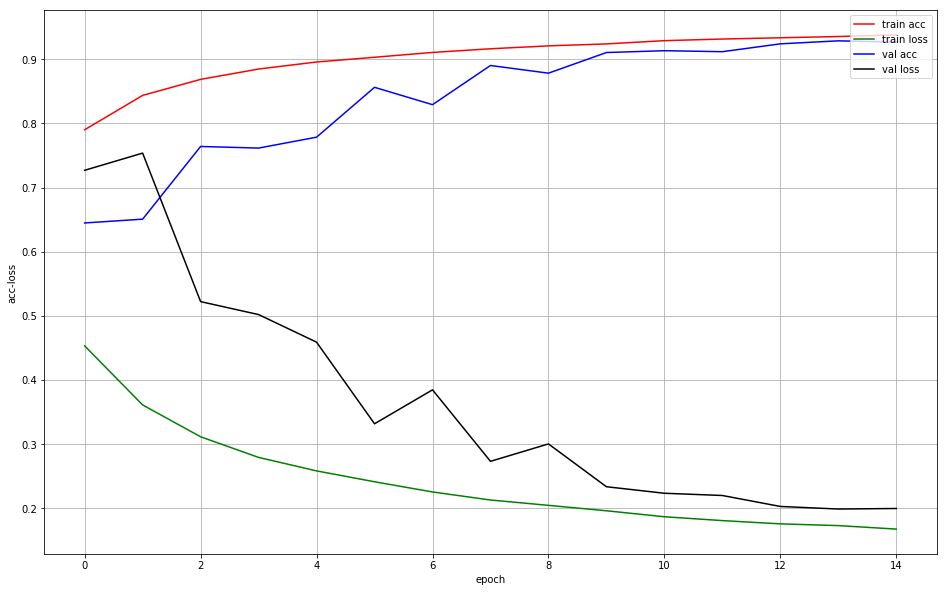

In [40]:
history.plot("epoch")
history.save("A.npy")

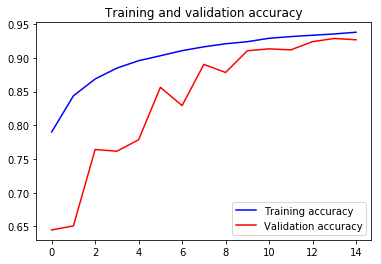

In [41]:
import matplotlib.pyplot as plt
train_acc = his.history['acc']
val_acc = his.history['val_acc']

epochs = range(len(train_acc))
plt.plot(epochs,train_acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [73]:
test_df = pd.read_csv(datapath+'sample_submission.csv')

from matplotlib.pyplot import imread
# Kaggle testing
from glob import glob
TESTING_BATCH_SIZE = 64

# datapath='../input/'+os.listdir("../input")[1]+'/'
# if not Path(datapath).is_dir():
#     datapath='../intput/'
tmp_path=datapath+'test/'
testing_files = glob(os.path.join(tmp_path,'*.tif'))
submission = pd.DataFrame()
print(len(testing_files))
for index in range(0, len(testing_files), TESTING_BATCH_SIZE):
    data_frame = pd.DataFrame({'path': testing_files[index:index+TESTING_BATCH_SIZE]})
    data_frame['id'] = data_frame.path.map(lambda x: x.split('/')[3].split(".")[0])
    data_frame['image'] = data_frame['path'].map(imread)
    images = np.stack(data_frame.image, axis=0)
    predicted_labels = [model.predict(np.expand_dims(image/255.0, axis=0))[0][0] for image in images]
    predictions = np.array(predicted_labels)
    data_frame['label'] = predictions
    submission = pd.concat([submission, data_frame[["id", "label"]]])
    if index % 1000 == 0 :
        print(index/len(testing_files) * 100)
submission.to_csv('submission_new_model.csv', index=False, header=True)
model.save('model.h5')
print(submission.head())

57458


IndexError: list index out of range